<div style = "background-image:'conda.jpg';background-repeat: no-repeat">


<center> 

<h1 style="color:blue"> Kaggle Expedia Hotel Recommendation Competition</h1>
<h2 style = "color:orange"> Team Snakes </h2>
<h3>
Hardy Chen<br>
Xing Gao<br>
Brandon Hart<br>
Jenny Ma<br>
</h3>

</center>

<br>
<br>
<br>
<br>
<br>
<br>
<hr>

<div style = "background-color:orange;padding:5px;border:solid;border-color:black;">
<p>Expedia wants to provide personalized hotel recommendations to their users. </p>
<p>https://www.kaggle.com/c/expedia-hotel-recommendations</p>
</div>
</div>

<img src = "expedia.png">

<center><img src = "leaders.jpg"></center>

In [10]:
import pandas as pd


train = pd.read_csv("train.csv") # Almost 4 Gigs!!!
test = pd.read_csv("test.csv")

# See how many rows/columns 
print(train.shape) # includes website click data from 2013 and 2014
print(test.shape) # includes actual booking in 2015

# Target attribute is hotel_cluster, which isn't given in test data set
# We must give 5 predictions, so expedia can show new user 5 hotel clusters
# based on their activity on the website

# Get familiar with data
train.head(5)
test.head(5)

id            date_time  site_name  posa_continent  user_location_country  \
0   0  2015-09-03 17:09:54          2               3                     66   
1   1  2015-09-24 17:38:35          2               3                     66   
2   2  2015-06-07 15:53:02          2               3                     66   
3   3  2015-09-14 14:49:10          2               3                     66   
4   4  2015-07-17 09:32:04          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   174               37449                  5539.0567   
1                   174               37449                  5873.2923   
2                   142               17440                  3975.9776   
3                   258               34156                  1508.5975   
4                   467               36345                    66.7913   

   user_id  is_mobile      ...          srch_ci     srch_co srch_adults_cnt  \
0        1          1      ...       2016-05-19  2016-05-23               2   
1        1          1      ...       2016-05-12  2016-05-15               2   
2       20          0      ...       2015-07-26  2015-07-27               4   
3       28          0      ...       2015-09-14  2015-09-16               2   
4       50          0      ...       2015-07-22  2015-07-23               2   

  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
0                 0            1                12243   
1                 0            1                14474   
2                 0            1                11353   
3                 0            1                 8250   
4                 0            1                11812   

   srch_destination_type_id  hotel_continent  hotel_country  hotel_market  
0                         6                6            204            27  
1                         7                6            204          1540  
2                         1                2             50           699  
3                         1                2             50           628  
4                         1                2             50           538  

[5 rows x 22 columns]

<h1><blink>Yikes, that's a lot of data!</blink></h1>

In [92]:
#get data infomation
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 26 columns):
date_time                    datetime64[ns]
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
year                         int

In [12]:
#distribution of hotel
hotelDistribution = train["hotel_cluster"].value_counts()
print (hotelDistribution)
# Pretty even

91    1043720
41     772743
48     754033
64     704734
65     670960
5      620194
98     589178
59     570291
42     551605
21     550092
70     545572
18     545284
83     534132
46     534038
25     530591
62     518809
95     509266
28     507016
68     503797
82     503755
37     496061
50     489892
30     489287
9      488328
58     483253
97     479446
16     477868
72     457463
1      452694
99     444887
       ...   
19     282893
84     278264
66     273505
38     269246
87     260398
23     259233
12     259022
31     257587
67     255946
43     253578
7      252447
54     250745
92     244343
89     243560
45     241408
49     240124
3      225250
80     220218
60     217919
71     216054
93     214293
86     209054
14     192299
75     165226
24     164127
35     139122
53     134812
88     107784
27     105040
74      48355
Name: hotel_cluster, dtype: int64


In [13]:
#ids in test dataset is subset of ids in train dataset
#so when we downsample, we need to keep this rule

testids = set(test.user_id.unique())
trainids = set(train.user_id.unique())

inter = len(testids & trainids)
inter == len(testids)

True

In [18]:
#since date_time is string in original dataset, we convert it to year and month
train["date_time"] = pd.to_datetime(train["date_time"])
train["year"] = train["date_time"].dt.year # Creating Column Year and extracting year from date_time
train["month"] = train["date_time"].dt.month # Creating Column Month and extracting month from date_time

print(train.head(5))

            date_time  site_name  posa_continent  user_location_country  \
0 2014-08-11 07:46:59          2               3                     66   
1 2014-08-11 08:22:12          2               3                     66   
2 2014-08-11 08:24:33          2               3                     66   
3 2014-08-09 18:05:16          2               3                     66   
4 2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...    srch_destination_id  \
0       12          0           1  ... 

In [19]:
#downsample to 10000 users 
import random
unique_users = train.user_id.unique()

select_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)),10000))]
select_train = train[train.user_id.isin(select_user_ids)]
                     
train10000 = select_train[((select_train.year == 2013) | ((select_train.year == 2014) & (select_train.month < 8)))]
test10000 = select_train[((select_train.year == 2014) & (select_train.month >= 8))]

In [20]:
#remove click event
#because we use test dataset to find out if our prediction correcr or not, so we only need row which have booking already                     
test10000 = test10000[test10000.is_booking == True]

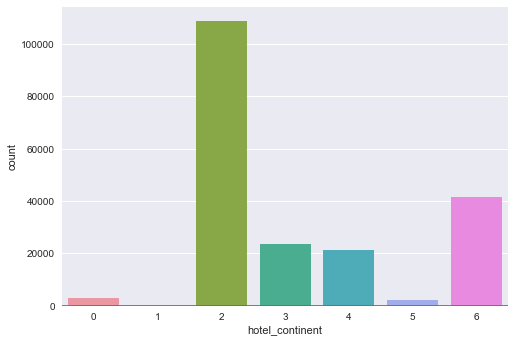

In [50]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

# preferred continent destinations
sns.countplot(x='hotel_continent', data=train10000)
sns.plt.show()

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


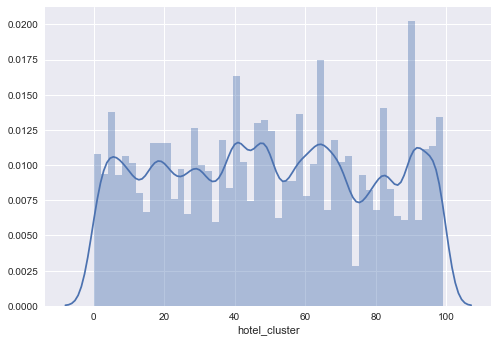

In [51]:
# get sense on how the hotel cluster data is distributed
x = train10000.hotel_cluster
sns.distplot(x)
sns.plt.show()

In [65]:
train10000['Year']   = train10000['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
train10000['Month']  = train10000['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
train10000['Week']   = train10000['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

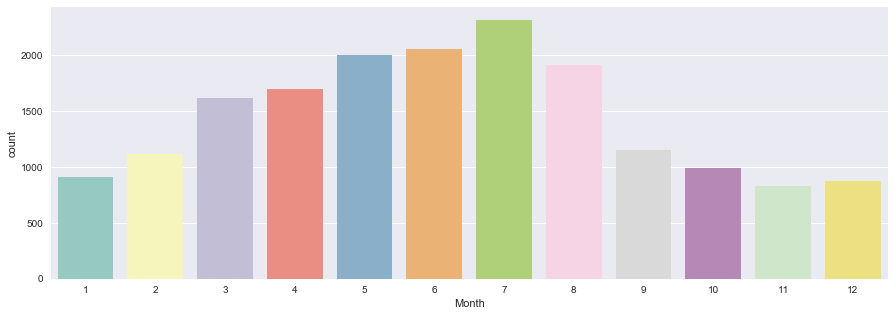

In [73]:
fig, (axis1) = plt.subplots(1,sharex=True,figsize=(15,5))

# Plot How many bookings in each month
sns.countplot('Month',data=train10000[train10000["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)
sns.plt.show()



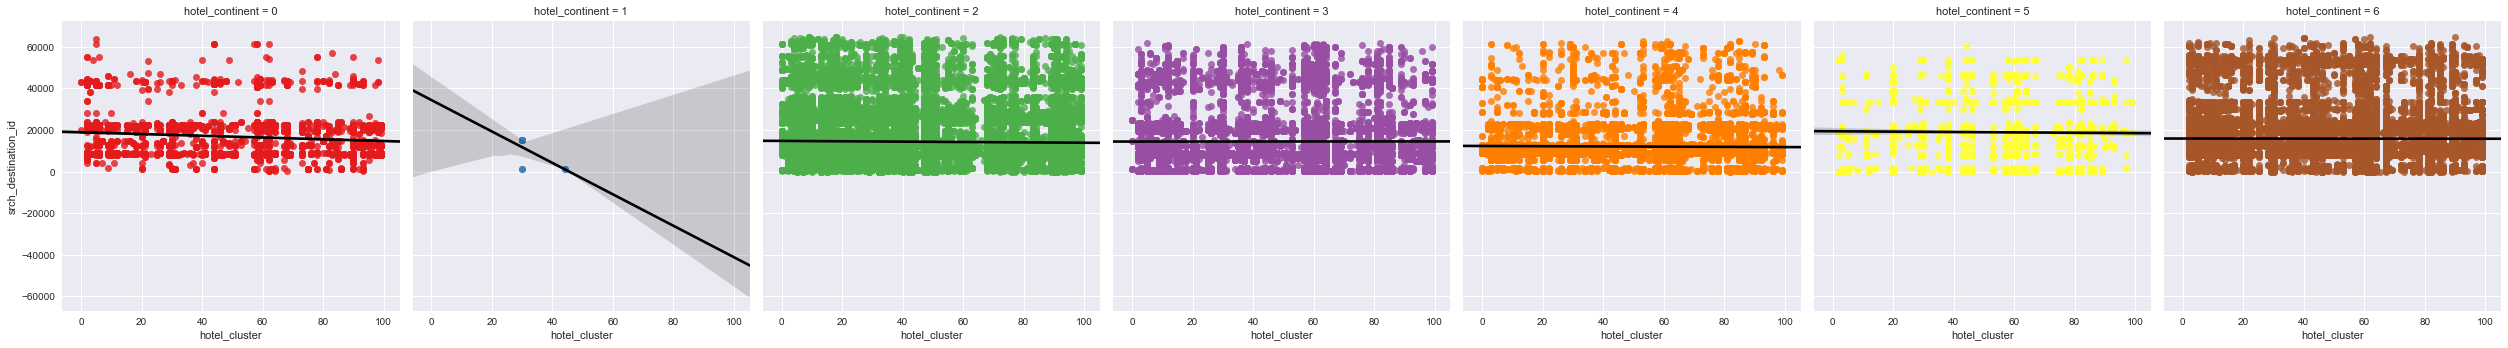

In [54]:
# plot correlation between hotel cluster with type of destination which seperated by hotel continent
sns.lmplot(x="hotel_cluster", y="srch_destination_id", hue ="hotel_continent", col="hotel_continent", palette="Set1", line_kws={"color": 'black'}, data=train10000)
sns.plt.show()

In [42]:
#Finding correlations, (non-linear correlations)
train10000.corr()["hotel_cluster"]

site_name                   -0.025081
posa_continent               0.009073
user_location_country       -0.006551
user_location_region         0.003381
user_location_city           0.005621
orig_destination_distance    0.003920
user_id                     -0.005293
is_mobile                    0.013980
is_package                   0.045803
channel                      0.001417
srch_adults_cnt              0.012574
srch_children_cnt            0.010699
srch_rm_cnt                 -0.002847
srch_destination_id         -0.023237
srch_destination_type_id    -0.040485
is_booking                  -0.017309
cnt                          0.004491
hotel_continent             -0.013364
hotel_country               -0.028347
hotel_market                 0.029564
hotel_cluster                1.000000
year                        -0.005049
month                        0.006430
Name: hotel_cluster, dtype: float64

In [93]:
#Try to do machine learning
factors = [c for c in train10000.columns if c in ["is_package","hotel_market"]]
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10, min_weight_fraction_leaf = 0.1)
scores = cross_validation.cross_val_score(clf, train10000[factors],train10000['hotel_cluster'],cv=3)
scores

array([ 0.05599844,  0.0555514 ,  0.06012516])

In [21]:
#do a simple test algorithm: [top 5 popular] head defaults to 5 and index sorts Desc
#so we can understand how the game works
mostCommonCluster = list(train10000.hotel_cluster.value_counts().head().index)
print(mostCommonCluster)


[91, 41, 48, 64, 5]


In [22]:
predictions = []
for i in range(test10000.shape[0]):
    predictions.append(mostCommonCluster)

In [24]:
import ml_metrics as metrics
target = [[l] for l in test10000["hotel_cluster"]]
target = []
for l in test10000["hotel_cluster"]:
    target.append([l])
metrics.mapk(target, predictions, k=5)


0.062708825847123714

In [25]:
#Use srch_destination_id to generate top clusters in each detsination 
#clusterCols = [["srch_destination_id"],["hotel_cluster"]]
#groups = {(destination, hotel):[row1,row2],(destination, hotel):[row3,row4]}

matchCols = ["srch_destination_id"]
clusterCols = matchCols + ["hotel_cluster"] #Concatenates
groups = train10000.groupby(clusterCols) # Aggregates


In [27]:
#score algorithm: score = bookings + 0.25 * clicks to calculate the most popular hotel cluster
topClusters = {}
# looks like this groups = {(destination, hotel):[row1,row2],(destination, hotel):[row3,row4]}
for name,group in groups:
    clicks = len(group.is_booking[group.is_booking == 0])
    bookings = len(group.is_booking[group.is_booking == 1])
    score = bookings + 0.25 * clicks
    
    clusName = name[0]
    if clusName not in topClusters:
        topClusters[clusName] = {}
    topClusters[clusName][name[-1]] = score

In [35]:
#{'destination1':{'Hotel1':socore,'Hotel2':socore,'Hotel3':socore}}  
# We are going to find top 5 hotel in a certain destination now

import operator
clusterDict ={}
for n in topClusters:
    tc = topClusters[n]
    top= [ lst[0] for lst in sorted(tc.items(), key=operator.itemgetter(1),reverse=True)[:5]]
    clusterDict[n] = top    

In [36]:
#make a prediction
#match with "destinationID" in test dataset to make a list 
prediction = []
for index,row in test10000.iterrows():
    key = row["srch_destination_id"]
    if key in clusterDict:
        prediction.append(clusterDict[key])
    else:
        prediction.append([])
        
        
#evaluate our prediction
metrics.mapk([[l] for l in test10000["hotel_cluster"]], prediction, k=5)



0.23507289204097714

In [90]:
#make a function so we can try different combination of variables 
def generate_exact_matches(tbl,matchCols):
    groups = train10000.groupby(matchCols)
    index = tuple()
    for t in matchCols:
        index += (tbl[t],)

    try:
        group = groups.get_group(index)
    except Exception:
        return []
    cluster = list(set(group.hotel_cluster))
    return cluster

#Try our function
exactMatches1 =[]
for i in range(test10000.shape[0]):
    exactMatches1.append(generate_exact_matches(test10000.iloc[i],matchCols1))

In [91]:
import ml_metrics as metrics
target = [[l] for l in test10000["hotel_cluster"]]
metrics.mapk([[l] for l in test10000["hotel_cluster"]], exactMatches1, k=5)

0.057742316784869976

In [85]:
#combining predictions 
def combinePredictions(lst):
   results = []
   for i in lst:
        if i not in results:
            results.append(i)
   return results

In [87]:
fullPrediction = [combinePredictions(exactMatches1[p] + prediction[p] + mostCommonCluster)[:5] for p in range(len(exactMatches1))]
metrics.mapk([[l] for l in test10000["hotel_cluster"]],fullPrediction,k=5)

0.2758424408014572